In [ ]:
#
# The following material values were extracted from the manufacturer's website
# Veekim (https://veekim.com/products) 
# from PDF files and converted into machine-readable CSV format. 
# These datasets serve as an interface for comparison with other property data.
# The material values can be compared in diagrams for analysis purposes.
#
# Please note that the information is provided without warranty. 
# In some data points, the conversion may not have been successful,
# but the most important data is correctly assigned. 
# Please verify with the manufacturer's original data for comparison.
#
# the data is plottet in another jupyter notebook
#


In [8]:
!pip install PyPDF2


In [28]:
!pip install camelot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 27.8 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 26.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 62.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 52.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.2/131.2 kB 58.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.3/12

In [19]:
!pip install PyMuPDF

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 86.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 81.2 MB/s eta 0:00:0000:0100:01


In [7]:
import requests

# URLs der PDF-Dateien
urls = [
    "https://veekim.com/sites/veekim.com/files/2023-08/tabelle_hybrid_compounds.pdf",
    "https://veekim.com/sites/veekim.com/files/2023-08/tabellen_kunststoffgeb_NdFeB_gespritzt.pdf",
    "https://veekim.com/sites/veekim.com/files/2023-08/tabelle_kunststoffgeb_ferrit.pdf",
    "https://veekim.com/sites/veekim.com/files/2023-09/kunststoffgeb_gepresstes_NdFeB.pdf",
    "https://veekim.com/sites/veekim.com/files/2023-09/tabelle_gesintertes_SmCo.pdf",
    "https://veekim.com/sites/veekim.com/files/2023-09/tabelle_gesintertes_NdFeB.pdf"
]

# Dateinamen für die heruntergeladenen PDF-Dateien
filenames = [
    "tabelle_hybrid_compounds.pdf",
    "tabellen_kunststoffgeb_NdFeB_gespritzt.pdf",
    "tabelle_kunststoffgeb_ferrit.pdf",
    "kunststoffgeb_gepresstes_NdFeB.pdf",
    "tabelle_gesintertes_SmCo.pdf",
    "tabelle_gesintertes_NdFeB.pdf"
]

# Download der PDF-Dateien
for url, filename in zip(urls, filenames):
    response = requests.get(url)
    with open(filename, "wb") as file:
        file.write(response.content)


In [15]:
import PyPDF2
import pandas as pd

# Aktualisierte Liste der PDF-Dateinamen mit dem vollständigen Pfad
filenames = [
    "./magnet-material/tabelle_hybrid_compounds.pdf",
    "./magnet-material/tabellen_kunststoffgeb_NdFeB_gespritzt.pdf",
    "./magnet-material/tabelle_kunststoffgeb_ferrit.pdf",
    "./magnet-material/kunststoffgeb_gepresstes_NdFeB.pdf",
    "./magnet-material/tabelle_gesintertes_SmCo.pdf",
    "./magnet-material/tabelle_gesintertes_NdFeB.pdf"
]

# Funktion zum Lesen und Konvertieren einer PDF in einen Text-String
def pdf_to_text(filename):
    with open(filename, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page_num in range(len(reader.pages)):
            text += reader.pages[page_num].extract_text()
        return text

# Erstellen eines DataFrames für jede PDF
data_frames = {}
for filename in filenames:
    text = pdf_to_text(filename)
    data_frames[filename] = pd.DataFrame([text.split('\n')])

# Anzeigen des Inhalts einer PDF als Beispiel
example_pdf = filenames[0]  # Erste PDF in der Liste als Beispiel
print(data_frames[example_pdf].head())


                                                   0
0  Hybrid\tCompounds\tTypeBr (mT)HcB (kA/m)HcI (k...


In [9]:
filenames


['tabelle_hybrid_compounds.pdf',
 'tabellen_kunststoffgeb_NdFeB_gespritzt.pdf',
 'tabelle_kunststoffgeb_ferrit.pdf',
 'kunststoffgeb_gepresstes_NdFeB.pdf',
 'tabelle_gesintertes_SmCo.pdf',
 'tabelle_gesintertes_NdFeB.pdf']

In [97]:
import os

# Auflisten aller Dateien und Ordner im aktuellen Arbeitsverzeichnis
current_directory_contents = os.listdir()

current_directory_contents


['.ipynb_checkpoints',
 '.npm',
 'magnet-material',
 '.profile',
 '.local',
 'untitled.txt',
 'jupyterhub-venv',
 'jupyterhub_config.py',
 'config',
 'tabelle_kunststoffgeb_ferrit.csv',
 'tabellen_kunststoffgeb_NdFeB_gespritzt.pdf',
 'tabelle_gesintertes_NdFeB.pdf',
 'kunststoffgeb_gepresstes_NdFeB_df.csv',
 '.cloud-locale-test.skip',
 '.cache',
 'jupyterhub-proxy.pid',
 'jupyterhub.sqlite',
 '.bashrc',
 'kunststoffgeb_gepresstes_NdFeB.pdf',
 '.ipython',
 'tabelle_gesintertes_SmCo.pdf',
 'tabelle_kunststoffgeb_ferrit.pdf',
 'jupyterhub_cookie_secret',
 '.bash_history',
 '.config',
 '.jupyter',
 'Untitled.ipynb',
 '.bash_logout',
 'tabelle_hybrid_compounds.pdf']

In [91]:
# kunststoffgeb_gepresstes_NdFeB.pdf
import pandas as pd

# Daten für den Datensatz
data = {
    'Type': ['VE-NDC 24/64', 'VE-NDC 60/72', 'VE-NDC 68/136', 'VE-NDC 72/80', 'VE-NDC 88/80', 'VE-NDC 96/88', 'VE-NDC 104/64'],
    'Br (mT)': [400, 600, 650, 680, 750, 770, 830],
    'HcB (kA/m)': [240, 400, 480, 440, 480, 520, 480],
    'HcI (kA/m)': [640, 720, 1360, 800, 800, 880, 640],
    '(BH)max (kJ/m³)': [24, 60, 68, 72, 88, 96, 104],
    'Dichte (g/cm³)': [4.8, 5.8, 6.0, 6.0, 6.2, 6.2, 6.3],
    'Arbeitstemp. (°C)': ['160°C', '160°C', '160°C', '160°C', '160°C', '160°C', '160°C']
}

# DataFrame erstellen
kunststoffgeb_gepresstes_NdFeB_df = pd.DataFrame(data)

# DataFrame anzeigen
print(kunststoffgeb_gepresstes_NdFeB_df)
# Den DataFrame in eine CSV-Datei speichern
kunststoffgeb_gepresstes_NdFeB_df.to_csv('kunststoffgeb_gepresstes_NdFeB_df.csv', index=False)


            Type  Br (mT)  HcB (kA/m)  HcI (kA/m)  (BH)max (kJ/m³)  \
0   VE-NDC 24/64      400         240         640               24   
1   VE-NDC 60/72      600         400         720               60   
2  VE-NDC 68/136      650         480        1360               68   
3   VE-NDC 72/80      680         440         800               72   
4   VE-NDC 88/80      750         480         800               88   
5   VE-NDC 96/88      770         520         880               96   
6  VE-NDC 104/64      830         480         640              104   

   Dichte (g/cm³) Arbeitstemp. (°C)  
0             4.8             160°C  
1             5.8             160°C  
2             6.0             160°C  
3             6.0             160°C  
4             6.2             160°C  
5             6.2             160°C  
6             6.3             160°C  


In [96]:
# tabelle_kunststoffgeb_ferrit.pdf

import pandas as pd

# Daten für den zweiten Datensatz
data_ferrite = {
    'Type': ['VE-FEP 11/25', 'VE-FEP 14/23', 'VE-FEP 16/20', 'VE-FEP 18/19', 'VE-FEP 8/27', 
             'VE-FEP 12/24', 'VE-FEP 15/23', 'VE-FEP 17/21', 'VE-FEP 19/19', 'VE-FEP 8/26', 
             'VE-FEP 11/20', 'VE-FEP 13/22', 'VE-FEP 14/18', 'VE-FEP 14/20'],
    'Br (mT)': [240, 272, 290, 305, 215, 247, 283, 298, 319, 205, 232, 265, 270, 273],
    'HcB (kA/m)': [180, 190, 185, 180, 140, 183, 195, 183, 171, 158, 163, 175, 167, 179],
    'HcI (kA/m)': [250, 230, 205, 195, 270, 239, 230, 211, 191, 260, 199, 220, 183, 203],
    '(BH)max (kJ/m³)': [11.2, 11.2, 16.5, 18.1, 8.5, 11.9, 15.6, 17.3, 19.3, 8.3, 10.7, 13.5, 14.3, 14.6],
    'Temp / Koeff. (%/k)': [-0.19, -0.19, -0.19, -0.19, -0.19, -0.19, -0.19, -0.19, -0.19, -0.19, -0.19, -0.19, -0.19, -0.19],
    'Dichte (g/cm³)': [3.22, 3.53, 3.71, 3.83, 3.03, 3.30, 3.63, 3.80, 3.98, 3.20, 3.25, 3.60, 3.80, 3.73],
    'Arbeitstemp. (°C)': ['120-160°C PA6 anisotrop', '120-160°C PA6 anisotrop', '120-160°C PA6 anisotrop', 
                          '120-160°C PA6 anisotrop', '120-140°C PA12 anisotrop', '120-140°C PA12 anisotrop', 
                          '120-140°C PA12 anisotrop', '120-140°C PA12 anisotrop', '120-140°C PA12 anisotrop', 
                          '220°C PPS anisotrop', '220°C PPS anisotrop', '220°C PPS anisotrop', 
                          '220°C PPS anisotrop', '220°C PPS anisotrop']
}

# DataFrame für kunststoffgebundene Ferrite erstellen
plastic_ferrite_df = pd.DataFrame(data_ferrite)

# DataFrame anzeigen
print(plastic_ferrite_df)



plastic_ferrite_df.to_csv('tabelle_kunststoffgeb_ferrit.csv', index=False)


            Type  Br (mT)  HcB (kA/m)  HcI (kA/m)  (BH)max (kJ/m³)  \
0   VE-FEP 11/25      240         180         250             11.2   
1   VE-FEP 14/23      272         190         230             11.2   
2   VE-FEP 16/20      290         185         205             16.5   
3   VE-FEP 18/19      305         180         195             18.1   
4    VE-FEP 8/27      215         140         270              8.5   
5   VE-FEP 12/24      247         183         239             11.9   
6   VE-FEP 15/23      283         195         230             15.6   
7   VE-FEP 17/21      298         183         211             17.3   
8   VE-FEP 19/19      319         171         191             19.3   
9    VE-FEP 8/26      205         158         260              8.3   
10  VE-FEP 11/20      232         163         199             10.7   
11  VE-FEP 13/22      265         175         220             13.5   
12  VE-FEP 14/18      270         167         183             14.3   
13  VE-FEP 14/20    

In [99]:
# tabelle_hybrid_compounds.pdf

# Daten für den DataFrame Hybrid Compounds
data_hybrid = {
    'Type': ['VE-FEND 20/57', 'VE-FEND 29/54', 'VE-FEND 19/59', 'VE-FEND 28/55', 
             'VE-NDSM 139/115', 'VE-NDSM 147/103', 'VE-NDSM 99/119', 'VE-NDSM 107/107'],
    'Br (mT)': [345, 412, 339, 405, 910, 940, 760, 780],
    'HcB (kA/m)': [224, 239, 221, 242, 636, 636, 557, 557],
    'HcI (kA/m)': [572, 542, 597, 557, 1153, 1034, 1193, 1074],
    '(BH)max (kJ/m³)': [20.3, 29.5, 19.9, 28.6, 139.2, 147.2, 99.5, 107.4],
    'Dichte (g/cm³)': [4.38, 4.38, 4.36, 4.36, 5.5, 5.5, 5.1, 5.1],
    'Arbeitstemp. (°C)': ['120-140°C PA12 isotrop', '120-140°C PA12 anisotrop', 
                          '120-160°C PPS isotrop', '120-160°C PPS anisotrop', 
                          '120-140°C PA12 anisotrop', '120-140°C PA12 anisotrop', 
                          '120-160°C PPS anisotrop', '120-160°C PPS anisotrop'],
    'Binder': ['Ferrit / NdFeB - Hybrid', 'Ferrit / NdFeB - Hybrid', 'Ferrit / NdFeB - Hybrid', 'Ferrit / NdFeB - Hybrid',
               'NdFeB / SmFeN - Hybrid', 'NdFeB / SmFeN - Hybrid', 'NdFeB / SmFeN - Hybrid', 'NdFeB / SmFeN - Hybrid']
}

# DataFrame für Hybrid Compounds erstellen
hybrid_cmpounds_df = pd.DataFrame(data_hybrid)

# DataFrame anzeigen
print(hybrid_cmpounds_df)


hybrid_cmpounds_df.to_csv('tabelle_hybrid_compounds.csv', index=False)


              Type  Br (mT)  HcB (kA/m)  HcI (kA/m)  (BH)max (kJ/m³)  \
0    VE-FEND 20/57      345         224         572             20.3   
1    VE-FEND 29/54      412         239         542             29.5   
2    VE-FEND 19/59      339         221         597             19.9   
3    VE-FEND 28/55      405         242         557             28.6   
4  VE-NDSM 139/115      910         636        1153            139.2   
5  VE-NDSM 147/103      940         636        1034            147.2   
6   VE-NDSM 99/119      760         557        1193             99.5   
7  VE-NDSM 107/107      780         557        1074            107.4   

   Dichte (g/cm³)         Arbeitstemp. (°C)                   Binder  
0            4.38    120-140°C PA12 isotrop  Ferrit / NdFeB - Hybrid  
1            4.38  120-140°C PA12 anisotrop  Ferrit / NdFeB - Hybrid  
2            4.36     120-160°C PPS isotrop  Ferrit / NdFeB - Hybrid  
3            4.36   120-160°C PPS anisotrop  Ferrit / NdFeB - Hybri

In [77]:
# Daten für den DataFrame kunststoffgebundene Ferrite
# tabelle_kunststoffgeb_ferrit.pdf

data_ferrite_2 = {
    'Type': ['VE-FEP 11/25', 'VE-FEP 14/23', 'VE-FEP 16/20', 'VE-FEP 18/19', 'VE-FEP 8/27', 
             'VE-FEP 12/24', 'VE-FEP 15/23', 'VE-FEP 17/21', 'VE-FEP 19/19', 'VE-FEP 8/26', 
             'VE-FEP 11/20', 'VE-FEP 13/22', 'VE-FEP 14/18', 'VE-FEP 14/20'],
    'Br (mT)': [240, 272, 290, 305, 215, 247, 283, 298, 319, 205, 232, 265, 270, 273],
    'HcB (kA/m)': [180, 190, 185, 180, 140, 183, 195, 183, 171, 158, 163, 175, 167, 179],
    'HcI (kA/m)': [250, 230, 205, 195, 270, 239, 230, 211, 191, 260, 199, 220, 183, 203],
    '(BH)max (kJ/m³)': [11.2, 14.2, 16.5, 18.1, 8.5, 11.9, 15.6, 17.3, 19.3, 8.3, 10.7, 13.5, 14.3, 14.6],
    'Temp / Koeff. (%/k)': [-0.19, -0.19, -0.19, -0.19, -0.19, -0.19, -0.19, -0.19, -0.19, -0.19, -0.19, -0.19, -0.19, -0.19],
    'Dichte (g/cm³)': [3.22, 3.53, 3.71, 3.83, 3.03, 3.30, 3.63, 3.80, 3.98, 3.20, 3.25, 3.60, 3.80, 3.73],
    'Arbeitstemp. (°C)': ['120-160°C PA6 anisotrop', '120-160°C PA6 anisotrop', '120-160°C PA6 anisotrop', 
                          '120-160°C PA6 anisotrop', '120-140°C PA12 anisotrop', '120-140°C PA12 anisotrop', 
                          '120-140°C PA12 anisotrop', '120-140°C PA12 anisotrop', '120-140°C PA12 anisotrop', 
                          '220°C PPS anisotrop', '220°C PPS anisotrop', '220°C PPS anisotrop', 
                          '220°C PPS anisotrop', '220°C PPS anisotrop'],
    'Binder': ['Kunststoffgebundene Ferrite', 'Kunststoffgebundene Ferrite', 'Kunststoffgebundene Ferrite', 
               'Kunststoffgebundene Ferrite', 'Kunststoffgebundene Ferrite', 'Kunststoffgebundene Ferrite', 
               'Kunststoffgebundene Ferrite', 'Kunststoffgebundene Ferrite', 'Kunststoffgebundene Ferrite', 
               'Kunststoffgebundene Ferrite', 'Kunststoffgebundene Ferrite', 'Kunststoffgebundene Ferrite', 
               'Kunststoffgebundene Ferrite', 'Kunststoffgebundene Ferrite']
}

# DataFrame für kunststoffgebundene Ferrite erstellen
df_plastic_ferrite_2 = pd.DataFrame(data_ferrite_2)

# DataFrame anzeigen
print(df_plastic_ferrite_2)


            Type  Br (mT)  HcB (kA/m)  HcI (kA/m)  (BH)max (kJ/m³)  \
0   VE-FEP 11/25      240         180         250             11.2   
1   VE-FEP 14/23      272         190         230             14.2   
2   VE-FEP 16/20      290         185         205             16.5   
3   VE-FEP 18/19      305         180         195             18.1   
4    VE-FEP 8/27      215         140         270              8.5   
5   VE-FEP 12/24      247         183         239             11.9   
6   VE-FEP 15/23      283         195         230             15.6   
7   VE-FEP 17/21      298         183         211             17.3   
8   VE-FEP 19/19      319         171         191             19.3   
9    VE-FEP 8/26      205         158         260              8.3   
10  VE-FEP 11/20      232         163         199             10.7   
11  VE-FEP 13/22      265         175         220             13.5   
12  VE-FEP 14/18      270         167         183             14.3   
13  VE-FEP 14/20    

In [78]:
# tabelle_gesintertes_SmCo.pdf

import pandas as pd

# Daten für den DataFrame gesintertes SmCo
data_smco = {
    'Type': ['VE-YX16', 'VE-XY18', 'VE-YX20', 'VE-YX22', 'VE-YX24', 'VE-YX16s', 'VE-YX18s', 
             'VE-YX20s', 'VE-YX22s', 'VE-YX24s', 'VE-YXG24H', 'VE-YXG26H', 'VE-YXG28H', 
             'VE-YXG30H', 'VE-YXG32H', 'VE-YXG22', 'VE-YXG24', 'VE-YXG26', 'VE-YXG28', 'VE-YXG30'],
    'Br (T)': ['0.81-0.85', '0.85-0.90', '0.90-0.94', '0.92-0.96', '0.96-1.00', '0.79-0.84', '0.84-0.89', 
               '0.89-0.93', '0.92-0.96', '0.96-1.00', '0.95-1.02', '1.02-1.05', '1.03-1.08', '1.08-1.10', 
               '1.10-1.13', '0.93-0.97', '0.95-1.02', '1.02-1.05', '1.03-1.08', '1.08-1.10'],
    'HcB (kA/m)': ['620-660', '660-700', '676-725', '710-748', '730-770', '612-652', '644-684', 
                   '684-724', '710-748', '740-780', '692-764', '749-769', '756-812', '788-835', 
                   '812-844', '676-740', '692-764', '748-796', '756-812', '788-835'],
    'HcI (kA/m)': ['1194-1830', '1194-1830', '1194-1830', '1194-1830', '1194-1830', '1194-1830', '> 1830', 
                   '> 1830', '> 1830', '> 1830', '> 1990', '> 1990', '> 1990', '> 1990', '> 1990', '> 1433', 
                   '> 1433', '> 1433', '> 1433', '> 1433'],
    '(BH)max (kJ/m³)': ['110-127', '127-143', '150-167', '160-175', '175-190', '118-135', '135-151', 
                        '150-167', '167-183', '183-199', '175-191', '191-207', '207-220', '220-240', 
                        '230-255', '160-183', '175-191', '191-207', '207-220', '220-240'],
    'Arbeitstemp. (°C)': [250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 350, 350, 350, 350, 
                         350, 300, 300, 300, 300, 300],
    'Temp. Koeff.(Br) (%)': ['-0,050', '-0,050', '-0,050', '-0,050', '-0,050', '-0,035', '-0,040', '-0,045', '-0,045', '-0,045',
                             '-0,025', '-0,030', '-0,035', '-0,035', '-0,035', '-0,020', '-0,025', '-0,030', '-0,035', '-0,035'],
    'Temp. Koeff. (HcI) (%)': ['-0,30', '-0,30', '-0,30', '-0,30', '-0,30', '-0,30', '-0,30', '-0,30', '-0,30', '-0,30', 
                               '-0,20', '-0,20', '-0,20', '-0,20', '-0,20', '-0,20', '-0,20', '-0,20', '-0,20', '-0,20'],
    'Material': ['SmCo5', 'SmCo5', 'SmCo5', 'SmCo5', 'SmCo5', 'SmCo5', 'SmCo5', 'SmCo5', 'SmCo5', 
                'SmCo5', 'Sm2Co17', 'Sm2Co17', 'Sm2Co17', 'Sm2Co17', 'Sm2Co17', 'Sm2Co17', 'Sm2Co17', 
                'Sm2Co17', 'Sm2Co17', 'Sm2Co17']
}

# DataFrame für "Gesintertes SmCo" erstellen
df_smco = pd.DataFrame(data_smco)

# DataFrame anzeigen
print(df_smco)


         Type     Br (T) HcB (kA/m) HcI (kA/m) (BH)max (kJ/m³)  \
0     VE-YX16  0.81-0.85    620-660  1194-1830         110-127   
1     VE-XY18  0.85-0.90    660-700  1194-1830         127-143   
2     VE-YX20  0.90-0.94    676-725  1194-1830         150-167   
3     VE-YX22  0.92-0.96    710-748  1194-1830         160-175   
4     VE-YX24  0.96-1.00    730-770  1194-1830         175-190   
5    VE-YX16s  0.79-0.84    612-652  1194-1830         118-135   
6    VE-YX18s  0.84-0.89    644-684     > 1830         135-151   
7    VE-YX20s  0.89-0.93    684-724     > 1830         150-167   
8    VE-YX22s  0.92-0.96    710-748     > 1830         167-183   
9    VE-YX24s  0.96-1.00    740-780     > 1830         183-199   
10  VE-YXG24H  0.95-1.02    692-764     > 1990         175-191   
11  VE-YXG26H  1.02-1.05    749-769     > 1990         191-207   
12  VE-YXG28H  1.03-1.08    756-812     > 1990         207-220   
13  VE-YXG30H  1.08-1.10    788-835     > 1990         220-240   
14  VE-YXG

In [79]:
# tabelle_gesintertes_SmCo.pdf

import pandas as pd

# Daten für den DataFrame gesintertes SmCo
data_smco_second = {
    'Type': ['VE-YXG32', 'VE-YXG26M', 'VE-YXG28M', 'VE-YXG30M', 'VE-YXG32M', 
             'VE-YXG24L', 'VE-YXG26L', 'VE-YXG28L', 'VE-YXG30L', 'VE-YXG32L'],
    'Br (T)': ['1.10-1.13', '1.02-1.05', '1.03-1.08', '1.08-1.10', '1.10-1.13', '0.95-1.02', '1.02-1.05', '1.03-1.08', '1.08-1.15', '1.10-1.15'],
    'HcB (kA/m)': ['812-551', '676-780', '676-796', '676-835', '676-844', '541-716', '541-748', '541-764', '541-796', '541-812'],
    'HcI (kA/m)': ['> 1433', '955-1433', '955-1433', '955-1433', '955-1433', '636-955', '636-955', '636-955', '636-955', '636-955'],
    '(BH)max (kJ/m³)': ['230-255', '191-207', '207-220', '220-240', '230-255', '175-191', '191-207', '207-220', '220-240', '230-255'],
    'Arbeitstemp. (°C)': [300, 300, 300, 300, 300, 250, 250, 250, 250, 250],
    'Temp. Koeff.(Br) (%)': ['-0,035', '-0,035', '-0,035', '-0,035', '-0,035', '-0,025', '-0,035', '-0,035', '-0,035', '-0,035'],
    'Temp. Koeff. (HcI) (%)': ['-0,20', '-0,20', '-0,20', '-0,20', '-0,20', '-0,20', '-0,20', '-0,20', '-0,20', '-0,20'],
    'Material': ['Sm2Co17', 'Sm2Co17', 'Sm2Co17', 'Sm2Co17', 'Sm2Co17', 'Sm2Co17', 'Sm2Co17', 'Sm2Co17', 'Sm2Co17', 'Sm2Co17']
}

# DataFrame für "Gesintertes SmCo" erstellen
df_smco_second = pd.DataFrame(data_smco_second)

# DataFrame anzeigen
print(df_smco_second)


        Type     Br (T) HcB (kA/m) HcI (kA/m) (BH)max (kJ/m³)  \
0   VE-YXG32  1.10-1.13    812-551     > 1433         230-255   
1  VE-YXG26M  1.02-1.05    676-780   955-1433         191-207   
2  VE-YXG28M  1.03-1.08    676-796   955-1433         207-220   
3  VE-YXG30M  1.08-1.10    676-835   955-1433         220-240   
4  VE-YXG32M  1.10-1.13    676-844   955-1433         230-255   
5  VE-YXG24L  0.95-1.02    541-716    636-955         175-191   
6  VE-YXG26L  1.02-1.05    541-748    636-955         191-207   
7  VE-YXG28L  1.03-1.08    541-764    636-955         207-220   
8  VE-YXG30L  1.08-1.15    541-796    636-955         220-240   
9  VE-YXG32L  1.10-1.15    541-812    636-955         230-255   

   Arbeitstemp. (°C) Temp. Koeff.(Br) (%) Temp. Koeff. (HcI) (%) Material  
0                300               -0,035                  -0,20  Sm2Co17  
1                300               -0,035                  -0,20  Sm2Co17  
2                300               -0,035               

In [100]:
# tabelle_gesintertes_SmCo.pdf

import pandas as pd

# Daten für den ersten DataFrame "gesintertes SmCo"
data_smco = {
    'Type': ['VE-YX16', 'VE-XY18', 'VE-YX20', 'VE-YX22', 'VE-YX24', 'VE-YX16s', 'VE-YX18s', 
             'VE-YX20s', 'VE-YX22s', 'VE-YX24s', 'VE-YXG24H', 'VE-YXG26H', 'VE-YXG28H', 
             'VE-YXG30H', 'VE-YXG32H', 'VE-YXG22', 'VE-YXG24', 'VE-YXG26', 'VE-YXG28', 'VE-YXG30'],
    'Br (T)': ['0.81-0.85', '0.85-0.90', '0.90-0.94', '0.92-0.96', '0.96-1.00', '0.79-0.84', '0.84-0.89', 
               '0.89-0.93', '0.92-0.96', '0.96-1.00', '0.95-1.02', '1.02-1.05', '1.03-1.08', '1.08-1.10', 
               '1.10-1.13', '0.93-0.97', '0.95-1.02', '1.02-1.05', '1.03-1.08', '1.08-1.10'],
    'HcB (kA/m)': ['620-660', '660-700', '676-725', '710-748', '730-770', '612-652', '644-684', 
                   '684-724', '710-748', '740-780', '692-764', '749-769', '756-812', '788-835', 
                   '812-844', '676-740', '692-764', '748-796', '756-812', '788-835'],
    'HcI (kA/m)': ['1194-1830', '1194-1830', '1194-1830', '1194-1830', '1194-1830', '1194-1830', '> 1830', 
                   '> 1830', '> 1830', '> 1830', '> 1990', '> 1990', '> 1990', '> 1990', '> 1990', '> 1433', 
                   '> 1433', '> 1433', '> 1433', '> 1433'],
    '(BH)max (kJ/m³)': ['110-127', '127-143', '150-167', '160-175', '175-190', '118-135', '135-151', 
                        '150-167', '167-183', '183-199', '175-191', '191-207', '207-220', '220-240', 
                        '230-255', '160-183', '175-191', '191-207', '207-220', '220-240'],
    'Arbeitstemp. (°C)': [250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 350, 350, 350, 350, 
                         350, 300, 300, 300, 300, 300],
    'Temp. Koeff.(Br) (%)': ['-0,050', '-0,050', '-0,050', '-0,050', '-0,050', '-0,035', '-0,040', '-0,045', '-0,045', '-0,045',
                             '-0,025', '-0,030', '-0,035', '-0,035', '-0,035', '-0,020', '-0,025', '-0,030', '-0,035', '-0,035'],
    'Temp. Koeff. (HcI) (%)': ['-0,30', '-0,30', '-0,30', '-0,30', '-0,30', '-0,30', '-0,30', '-0,30', '-0,30', '-0,30', 
                               '-0,20', '-0,20', '-0,20', '-0,20', '-0,20', '-0,20', '-0,20', '-0,20', '-0,20', '-0,20'],
    'Material': ['SmCo5', 'SmCo5', 'SmCo5', 'SmCo5', 'SmCo5', 'SmCo5', 'SmCo5', 'SmCo5', 'SmCo5', 
                'SmCo5', 'Sm2Co17', 'Sm2Co17', 'Sm2Co17', 'Sm2Co17', 'Sm2Co17', 'Sm2Co17', 'Sm2Co17', 
                'Sm2Co17', 'Sm2Co17', 'Sm2Co17']
}

# Ersten DataFrame "gesintertes SmCo" erstellen
df_smco = pd.DataFrame(data_smco)

# Daten für den zweiten DataFrame "gesintertes SmCo (fortgesetzt)"
data_smco_second = {
    'Type': ['VE-YXG32', 'VE-YXG26M', 'VE-YXG28M', 'VE-YXG30M', 'VE-YXG32M', 
             'VE-YXG24L', 'VE-YXG26L', 'VE-YXG28L', 'VE-YXG30L', 'VE-YXG32L'],
    'Br (T)': ['1.10-1.13', '1.02-1.05', '1.03-1.08', '1.08-1.10', '1.10-1.13', '0.95-1.02', '1.02-1.05', '1.03-1.08', '1.08-1.15', '1.10-1.15'],
    'HcB (kA/m)': ['812-551', '676-780', '676-796', '676-835', '676-844', '541-716', '541-748', '541-764', '541-796', '541-812'],
    'HcI (kA/m)': ['> 1433', '955-1433', '955-1433', '955-1433', '955-1433', '636-955', '636-955', '636-955', '636-955', '636-955'],
    '(BH)max (kJ/m³)': ['230-255', '191-207', '207-220', '220-240', '230-255', '175-191', '191-207', '207-220', '220-240', '230-255'],
    'Arbeitstemp. (°C)': [300, 300, 300, 300, 300, 250, 250, 250, 250, 250],
    'Temp. Koeff.(Br) (%)': ['-0,035', '-0,035', '-0,035', '-0,035', '-0,035', '-0,025', '-0,035', '-0,035', '-0,035', '-0,035'],
    'Temp. Koeff. (HcI) (%)': ['-0,20', '-0,20', '-0,20', '-0,20', '-0,20', '-0,20', '-0,20', '-0,20', '-0,20', '-0,20'],
    'Material': ['Sm2Co17', 'Sm2Co17', 'Sm2Co17', 'Sm2Co17', 'Sm2Co17', 'Sm2Co17', 'Sm2Co17', 'Sm2Co17', 'Sm2Co17', 'Sm2Co17']
}

# Zweiten DataFrame "gesintertes SmCo (fortgesetzt)" erstellen
df_smco_second = pd.DataFrame(data_smco_second)

# Die beiden DataFrames zusammenführen
tabelle_gesintertes_SmCo_df = pd.concat([df_smco, df_smco_second], ignore_index=True)

# DataFrame anzeigen
print(tabelle_gesintertes_SmCo_df)
tabelle_gesintertes_SmCo_df.to_csv('tabelle_gesintertes_SmCo.csv', index=False)


         Type     Br (T) HcB (kA/m) HcI (kA/m) (BH)max (kJ/m³)  \
0     VE-YX16  0.81-0.85    620-660  1194-1830         110-127   
1     VE-XY18  0.85-0.90    660-700  1194-1830         127-143   
2     VE-YX20  0.90-0.94    676-725  1194-1830         150-167   
3     VE-YX22  0.92-0.96    710-748  1194-1830         160-175   
4     VE-YX24  0.96-1.00    730-770  1194-1830         175-190   
5    VE-YX16s  0.79-0.84    612-652  1194-1830         118-135   
6    VE-YX18s  0.84-0.89    644-684     > 1830         135-151   
7    VE-YX20s  0.89-0.93    684-724     > 1830         150-167   
8    VE-YX22s  0.92-0.96    710-748     > 1830         167-183   
9    VE-YX24s  0.96-1.00    740-780     > 1830         183-199   
10  VE-YXG24H  0.95-1.02    692-764     > 1990         175-191   
11  VE-YXG26H  1.02-1.05    749-769     > 1990         191-207   
12  VE-YXG28H  1.03-1.08    756-812     > 1990         207-220   
13  VE-YXG30H  1.08-1.10    788-835     > 1990         220-240   
14  VE-YXG

In [81]:
# tabelle_gesintertes_NdFeB.pdf

import pandas as pd

# Daten für den DataFrame "Gesintertes NdFeB"
data_ndfeb = {
    'Type': ['VE-N35', 'VE-N38', 'VE-N40', 'VE-N42', 'VE-N45', 'VE-N48', 'VE-N50', 'VE-N52', 
             'VE-N35M', 'VE-N38M', 'VE-N40M', 'VE-N42M', 'VE-N45M', 'VE-N48M', 'VE-N50M', 
             'VE-N33H', 'VE-N35H', 'VE-N38H', 'VE-N40H', 'VE-N42H', 'VE-N45H'],
    'Br (T) nom': [1.21, 1.26, 1.29, 1.32, 1.37, 1.41, 1.45, 1.49, 1.21, 1.26, 1.29, 1.32, 1.37, 1.41, 1.45, 1.17, 1.21, 1.26, 1.29, 1.32, 1.36],
    'Br (T) min': [1.17, 1.22, 1.26, 1.28, 1.33, 1.37, 1.41, 1.48, 1.17, 1.22, 1.26, 1.29, 1.33, 1.37, 1.41, 1.14, 1.17, 1.22, 1.26, 1.29, 1.32],
    'HcB (kA/m) nom': [915, 915, 876, 876, 876, 860, 860, 860, 924, 939, 971, 1003, 1019, 1019, 1019, 876, 915, 955, 955, 1003, 1019],
    'HcB (kA/m) min': [860, 860, 836, 836, 836, 812, 812, 812, 876, 907, 939, 971, 987, 987, 987, 820, 860, 915, 915, 971, 987],
    'HcI (kA/m) nom': [955, 955, 955, 955, 955, 955, 955, 955, 1114, 1114, 1114, 1114, 1114, 1114, 1114, 1353, 1353, 1353, 1353, 1353, 1353],
    'HcI (kA/m) min': [955, 955, 955, 955, 955, 955, 955, 955, 1114, 1114, 1114, 1114, 1114, 1114, 1114, 1353, 1353, 1353, 1353, 1353, 1353],
    '(BH)max (kJ/m³) nom': [279, 303, 318, 334, 358, 383, 398, 415, 279, 303, 318, 334, 358, 383, 398, 263, 263, 287, 303, 318, 342],
    '(BH)max (kJ/m³) min': [263, 287, 303, 318, 342, 367, 383, 398, 263, 287, 303, 318, 342, 367, 383, 247, 263, 287, 303, 318, 342],
    'Arbeitstemp. (°C) nom': [80, 80, 80, 80, 80, 80, 80, 80, 100, 100, 100, 100, 100, 100, 100, 120, 120, 120, 120, 120, 120],
    'Arbeitstemp. (°C) min': [80, 80, 80, 80, 80, 80, 80, 80, 100, 100, 100, 100, 100, 100, 100, 120, 120, 120, 120, 120, 120]
}

# DataFrame für "Gesintertes NdFeB" erstellen
df_ndfeb = pd.DataFrame(data_ndfeb)

# DataFrame anzeigen
print(df_ndfeb)


       Type  Br (T) nom  Br (T) min  HcB (kA/m) nom  HcB (kA/m) min  \
0    VE-N35        1.21        1.17             915             860   
1    VE-N38        1.26        1.22             915             860   
2    VE-N40        1.29        1.26             876             836   
3    VE-N42        1.32        1.28             876             836   
4    VE-N45        1.37        1.33             876             836   
5    VE-N48        1.41        1.37             860             812   
6    VE-N50        1.45        1.41             860             812   
7    VE-N52        1.49        1.48             860             812   
8   VE-N35M        1.21        1.17             924             876   
9   VE-N38M        1.26        1.22             939             907   
10  VE-N40M        1.29        1.26             971             939   
11  VE-N42M        1.32        1.29            1003             971   
12  VE-N45M        1.37        1.33            1019             987   
13  VE

In [82]:
# tabelle_gesintertes_NdFeB.pdf


import pandas as pd

# Daten für den DataFrame "Gesintertes NdFeB"
data_ndfeb_second = {
    'Type': ['VE-N48H', 'VE-N50H', 'VE-N35SH', 'VE-N38SH', 'VE-N40SH', 'VE-N42SH', 'VE-N45SH', 'VE-N48SH', 
             'VE-N28UH', 'VE-N30UH', 'VE-N33UH', 'VE-N35UH', 'VE-N38UH', 'VE-N40UH', 'VE-N42UH', 'VE-N45UH', 
             'VE-N28EH', 'VE-N30EH', 'VE-N33EH', 'VE-N35EH', 'VE-N38EH'],
    'Br (T) nom': [1.38, 1.45, 1.21, 1.26, 1.29, 1.32, 1.35, 1.38, 1.08, 1.12, 1.17, 1.21, 1.24, 1.27, 1.30, 1.35, 1.08, 1.12, 1.17, 1.21, 1.24],
    'Br (T) min': [1.36, 1.41, 1.17, 1.22, 1.26, 1.28, 1.33, 1.36, 1.04, 1.08, 1.14, 1.17, 1.21, 1.24, 1.28, 1.33, 1.04, 1.08, 1.12, 1.17, 1.20],
    'HcB (kA/m) nom': [1019, 1019, 915, 979, 1003, 1003, 1019, 1019, 812, 844, 875, 915, 955, 971, 987, 987, 811, 844, 878, 915, 955],
    'HcB (kA/m) min': [987, 987, 860, 939, 955, 971, 981, 981, 780, 804, 820, 860, 908, 924, 955, 955, 780, 804, 828, 860, 924],
    'HcI (kA/m) nom': [1353, 1353, 1595, 1595, 1595, 1595, 1595, 1595, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 2388, 2388, 2388, 2388, 2388],
    'HcI (kA/m) min': [1353, 1353, 1595, 1595, 1595, 1595, 1595, 1595, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 2388, 2388, 2388, 2388, 2388],
    '(BH)max (kJ/m³) nom': [375, 398, 279, 303, 318, 334, 358, 375, 223, 239, 263, 279, 303, 318, 342, 358, 223, 239, 263, 287, 303],
    '(BH)max (kJ/m³) min': [358, 383, 263, 287, 303, 318, 334, 358, 207, 223, 247, 263, 279, 303, 318, 334, 207, 223, 239, 263, 287],
    'Arbeitstemp. (°C) nom': [120, 120, 150, 150, 150, 150, 150, 150, 180, 180, 180, 180, 180, 180, 180, 180, 200, 200, 200, 200, 200],
    'Arbeitstemp. (°C) min': [120, 120, 150, 150, 150, 150, 150, 150, 180, 180, 180, 180, 180, 180, 180, 180, 200, 200, 200, 200, 200]
}

# DataFrame für "Gesintertes NdFeB" erstellen
df_ndfeb_second = pd.DataFrame(data_ndfeb_second)

# DataFrame anzeigen
print(df_ndfeb_second)


        Type  Br (T) nom  Br (T) min  HcB (kA/m) nom  HcB (kA/m) min  \
0    VE-N48H        1.38        1.36            1019             987   
1    VE-N50H        1.45        1.41            1019             987   
2   VE-N35SH        1.21        1.17             915             860   
3   VE-N38SH        1.26        1.22             979             939   
4   VE-N40SH        1.29        1.26            1003             955   
5   VE-N42SH        1.32        1.28            1003             971   
6   VE-N45SH        1.35        1.33            1019             981   
7   VE-N48SH        1.38        1.36            1019             981   
8   VE-N28UH        1.08        1.04             812             780   
9   VE-N30UH        1.12        1.08             844             804   
10  VE-N33UH        1.17        1.14             875             820   
11  VE-N35UH        1.21        1.17             915             860   
12  VE-N38UH        1.24        1.21             955            

In [83]:
# tabelle_gesintertes_NdFeB.pdf

import pandas as pd

# Daten für den DataFrame "Gesintertes NdFeB" (zusätzliche Daten)
data_ndfeb_third = {
    'Type': ['VE-N40EH', 'VE-N28AH', 'VE-N30AH', 'VE-N33AH', 'VE-N35AH', 'VE-N28VH', 'VE-N30VH', 'VE-N33VH', 'VE-N35VH', 'VE-N38VH'],
    'Br (T) nom': [1.27, 1.08, 1.12, 1.17, 1.21, 1.06, 1.11, 1.16, 1.20, 1.25],
    'Br (T) min': [1.24, 1.04, 1.08, 1.12, 1.17, 1.02, 1.08, 1.13, 1.17, 1.22],
    'HcB (kA/m) nom': [955, 828, 844, 876, 915, 811, 863, 913, 930, 960],
    'HcB (kA/m) min': [924, 796, 804, 828, 860, 773, 819, 857, 887, 925],
    'HcI (kA/m) nom': [2388, 2626, 2626, 2626, 2626, 3104, 3104, 3104, 3104, 3104],
    'HcI (kA/m) min': [2388, 2626, 2626, 2626, 2626, 3104, 3104, 3104, 3104, 3104],
    '(BH)max (kJ/m³) nom': [318, 223, 239, 263, 279, 220, 230, 263, 279, 303],
    '(BH)max (kJ/m³) min': [303, 207, 223, 247, 263, 199, 215, 239, 263, 287],
    'Arbeitstemp. (°C) nom': [200, 240, 240, 240, 240, 250, 250, 250, 250, 250],
    'Arbeitstemp. (°C) min': [200, 240, 240, 240, 240, 250, 250, 250, 250, 250]
}

# DataFrame für "Gesintertes NdFeB" (zusätzliche Daten) erstellen
df_ndfeb_third = pd.DataFrame(data_ndfeb_third)

# DataFrame anzeigen
print(df_ndfeb_third)


       Type  Br (T) nom  Br (T) min  HcB (kA/m) nom  HcB (kA/m) min  \
0  VE-N40EH        1.27        1.24             955             924   
1  VE-N28AH        1.08        1.04             828             796   
2  VE-N30AH        1.12        1.08             844             804   
3  VE-N33AH        1.17        1.12             876             828   
4  VE-N35AH        1.21        1.17             915             860   
5  VE-N28VH        1.06        1.02             811             773   
6  VE-N30VH        1.11        1.08             863             819   
7  VE-N33VH        1.16        1.13             913             857   
8  VE-N35VH        1.20        1.17             930             887   
9  VE-N38VH        1.25        1.22             960             925   

   HcI (kA/m) nom  HcI (kA/m) min  (BH)max (kJ/m³) nom  (BH)max (kJ/m³) min  \
0            2388            2388                  318                  303   
1            2626            2626                  223      

In [101]:
# tabelle_gesintertes_NdFeB.pdf

# Die drei DataFrames zusammenführen
sinterd_ndfeb_all_df = pd.concat([df_ndfeb, df_ndfeb_second, df_ndfeb_third], ignore_index=True)

# DataFrame anzeigen
print(sinterd_ndfeb_all_df)
sinterd_ndfeb_all_df.to_csv('tabelle_gesintertes_NdFeB.csv', index=False)


        Type  Br (T) nom  Br (T) min  HcB (kA/m) nom  HcB (kA/m) min  \
0     VE-N35        1.21        1.17             915             860   
1     VE-N38        1.26        1.22             915             860   
2     VE-N40        1.29        1.26             876             836   
3     VE-N42        1.32        1.28             876             836   
4     VE-N45        1.37        1.33             876             836   
5     VE-N48        1.41        1.37             860             812   
6     VE-N50        1.45        1.41             860             812   
7     VE-N52        1.49        1.48             860             812   
8    VE-N35M        1.21        1.17             924             876   
9    VE-N38M        1.26        1.22             939             907   
10   VE-N40M        1.29        1.26             971             939   
11   VE-N42M        1.32        1.29            1003             971   
12   VE-N45M        1.37        1.33            1019            

In [85]:
# tabelle_gesintertes_NdFeB.pdf

sinterd_ndfeb_all_df

Type  Br (T) nom  Br (T) min  HcB (kA/m) nom  HcB (kA/m) min  \
0     VE-N35        1.21        1.17             915             860   
1     VE-N38        1.26        1.22             915             860   
2     VE-N40        1.29        1.26             876             836   
3     VE-N42        1.32        1.28             876             836   
4     VE-N45        1.37        1.33             876             836   
5     VE-N48        1.41        1.37             860             812   
6     VE-N50        1.45        1.41             860             812   
7     VE-N52        1.49        1.48             860             812   
8    VE-N35M        1.21        1.17             924             876   
9    VE-N38M        1.26        1.22             939             907   
10   VE-N40M        1.29        1.26             971             939   
11   VE-N42M        1.32        1.29            1003             971   
12   VE-N45M        1.37        1.33            1019             987   
13   VE-N48M        1.41        1.37            1019             987   
14   VE-N50M        1.45        1.41            1019             987   
15   VE-N33H        1.17        1.14             876             820   
16   VE-N35H        1.21        1.17             915             860   
17   VE-N38H        1.26        1.22             955             915   
18   VE-N40H        1.29        1.26             955             915   
19   VE-N42H        1.32        1.29            1003             971   
20   VE-N45H        1.36        1.32            1019             987   
21   VE-N48H        1.38        1.36            1019             987   
22   VE-N50H        1.45        1.41            1019             987   
23  VE-N35SH        1.21        1.17             915             860   
24  VE-N38SH        1.26        1.22             979             939   
25  VE-N40SH        1.29        1.26            1003             955   
26  VE-N42SH        1.32        1.28            1003             971   
27  VE-N45SH        1.35        1.33            1019             981   
28  VE-N48SH        1.38        1.36            1019             981   
29  VE-N28UH        1.08        1.04             812             780   
30  VE-N30UH        1.12        1.08             844             804   
31  VE-N33UH        1.17        1.14             875             820   
32  VE-N35UH        1.21        1.17             915             860   
33  VE-N38UH        1.24        1.21             955             908   
34  VE-N40UH        1.27        1.24             971             924   
35  VE-N42UH        1.30        1.28             987             955   
36  VE-N45UH        1.35        1.33             987             955   
37  VE-N28EH        1.08        1.04             811             780   
38  VE-N30EH        1.12        1.08             844             804   
39  VE-N33EH        1.17        1.12             878             828   
40  VE-N35EH        1.21        1.17             915             860   
41  VE-N38EH        1.24        1.20             955             924   
42  VE-N40EH        1.27        1.24             955             924   
43  VE-N28AH        1.08        1.04             828             796   
44  VE-N30AH        1.12        1.08             844             804   
45  VE-N33AH        1.17        1.12             876             828   
46  VE-N35AH        1.21        1.17             915             860   
47  VE-N28VH        1.06        1.02             811             773   
48  VE-N30VH        1.11        1.08             863             819   
49  VE-N33VH        1.16        1.13             913             857   
50  VE-N35VH        1.20        1.17             930             887   
51  VE-N38VH        1.25        1.22             960             925   

    HcI (kA/m) nom  HcI (kA/m) min  (BH)max (kJ/m³) nom  (BH)max (kJ/m³) min  \
0              955             955                  279                  263   
1              955             

In [110]:
# tabellen_kunststoffgeb_NdFeB_gespritzt.pdf

import pandas as pd

# Daten für den DataFrame "Kunststoffgebundenes NdFeB (gespritzt)"
data_ndfeb_kunststoff = {
    'Type': ['VE-NDP 38/73', 'VE-NDP 41/73', 'VE-NDP 48/72', 'VE-NDP 57/70', 'VE NDP 65/70', 'VE-NDP 70/67', 'VE-NDP 77/67', 'VE-NDP 119/135', 'VE-NDP 123/111', 'VE-NDP 36/71', 'VE-NDP 44/90', 'VE-NDP 52/66', 'VE-NDP 56/66', 'VE-NDP 83/135', 'VE-NDP 87/111'],
    'Br (mT)': [480, 490, 535, 592, 633, 659, 705, 810, 840, 450, 517, 562, 583, 690, 700],
    'HcB (kA/m)': [320, 342, 345, 380, 403, 413, 427, 580, 572, 290, 354, 371, 380, 477, 477],
    'HcI (kA/m)': [730, 732, 724, 696, 700, 669, 676, 1352, 1114, 710, 899, 664, 661, 1352, 1114],
    '(BH)max (kJ/m³)': [38.0, 41.4, 49.3, 57.3, 65.3, 70.3, 77.2, 119.3, 123.3, 36.0, 44.6, 52.5, 65.5, 83.5, 87.5],
    'Temp. / Koeff. %/k': [-0.11, -0.11, -0.11, -0.11, -0.11, -0.11, -0.11, -0.14, -0.11, -0.11, -0.11, -0.11, -0.11, -0.14, -0.11],
    'Dichte (g/cm³)': [4.52, 4.90, 5.05, 5.38, 5.57, 5.65, 6.04, 5.20, 5.20, 4.60, 5.18, 5.20, 5.35, 4.70, 4.70],
    'Arbeitstemp. (°C)': ['120-140°C', '120-140°C', '120-140°C', '120-140°C', '120-140°C', '120-140°C', '120-140°C', '120-140°C', '120-140°C', '120-160°C', '120-160°C', '120-160°C', '120-160°C', '120-160°C', '120-160°C'],
    'Binder': ['PA12 isotrop', 'PA12 isotrop', 'PA12 isotrop', 'PA12 isotrop', 'PA12 isotrop', 'PA12 isotrop', 'PA12 isotrop', 'PA12 anisotrop', 'PA12 anisotrop', 'PPS isotrop', 'PPS isotrop', 'PPS isotrop', 'PPS isotrop', 'PPS anisotrop', 'PPS anisotrop']
}

# DataFrame für "Kunststoffgebundenes NdFeB (gespritzt)" erstellen
ndfeb_kunststoff_df = pd.DataFrame(data_ndfeb_kunststoff)

# DataFrame anzeigen
print(ndfeb_kunststoff_df)
ndfeb_kunststoff_df.to_csv('tabellen_kunststoffgeb_NdFeB_gespritzt.csv', index=False)


              Type  Br (mT)  HcB (kA/m)  HcI (kA/m)  (BH)max (kJ/m³)  \
0     VE-NDP 38/73      480         320         730             38.0   
1     VE-NDP 41/73      490         342         732             41.4   
2     VE-NDP 48/72      535         345         724             49.3   
3     VE-NDP 57/70      592         380         696             57.3   
4     VE NDP 65/70      633         403         700             65.3   
5     VE-NDP 70/67      659         413         669             70.3   
6     VE-NDP 77/67      705         427         676             77.2   
7   VE-NDP 119/135      810         580        1352            119.3   
8   VE-NDP 123/111      840         572        1114            123.3   
9     VE-NDP 36/71      450         290         710             36.0   
10    VE-NDP 44/90      517         354         899             44.6   
11    VE-NDP 52/66      562         371         664             52.5   
12    VE-NDP 56/66      583         380         661             

In [112]:
import os

# Verzeichnis, in dem Sie die Dateien filtern möchten
verzeichnis = './magnet-material'

# Liste zum Speichern der gefundenen PDF- und CSV-Dateien
gefundene_dateien = []

# Durchsuchen Sie das Verzeichnis und filtern Sie PDF- und CSV-Dateien
for dateiname in os.listdir(verzeichnis):
    if dateiname.endswith('.pdf') or dateiname.endswith('.csv'):
        gefundene_dateien.append(dateiname)

# Ausgabe der gefundenen PDF- und CSV-Dateien
print("Gefundene PDF- und CSV-Dateien:")
for dateiname in gefundene_dateien:
    print(dateiname)


Gefundene PDF- und CSV-Dateien:
tabelle_kunststoffgeb_ferrit.csv
tabellen_kunststoffgeb_NdFeB_gespritzt.pdf
tabelle_gesintertes_NdFeB.pdf
kunststoffgeb_gepresstes_NdFeB_df.csv
kunststoffgeb_gepresstes_NdFeB.pdf
tabelle_gesintertes_SmCo.pdf
tabelle_kunststoffgeb_ferrit.pdf
tabelle_gesintertes_SmCo.csv
tabelle_gesintertes_NdFeB.csv
tabelle_hybrid_compounds.csv
tabelle_hybrid_compounds.pdf


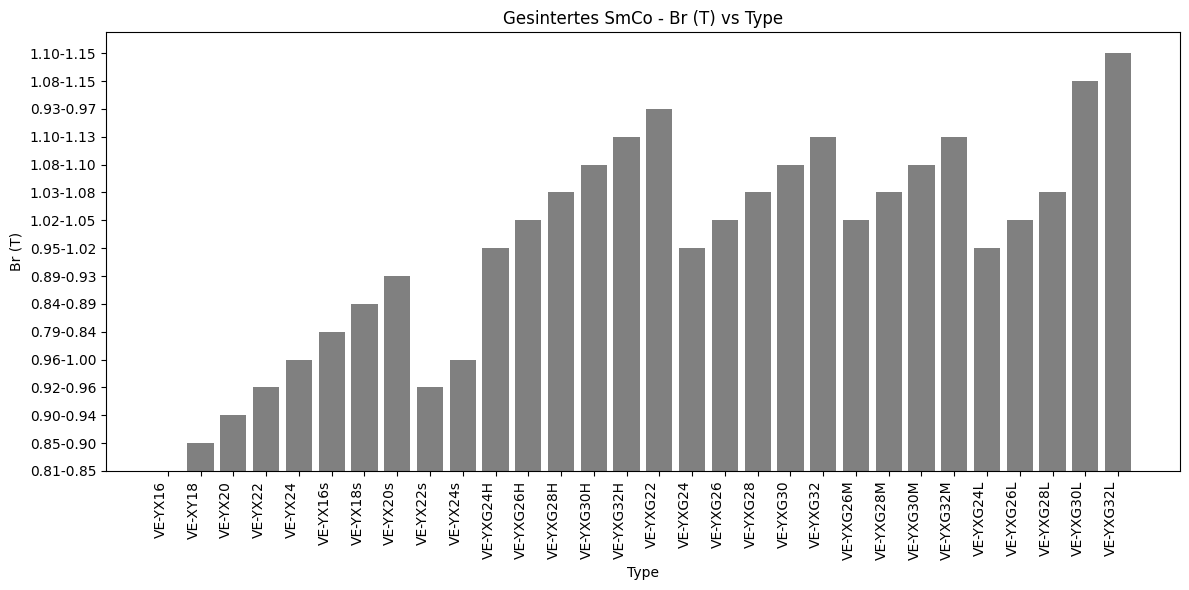

In [86]:
import matplotlib.pyplot as plt

# Daten für den Plot
x_values = df_combined_smco['Type']
y_values = df_combined_smco['Br (T)']

# Plot erstellen
plt.figure(figsize=(12, 6))
plt.bar(x_values, y_values, color='grey')
plt.xlabel('Type')
plt.ylabel('Br (T)')
plt.title('Gesintertes SmCo - Br (T) vs Type')
plt.xticks(rotation=90, ha="right")  
plt.tight_layout()

# Plot anzeigen
plt.show()


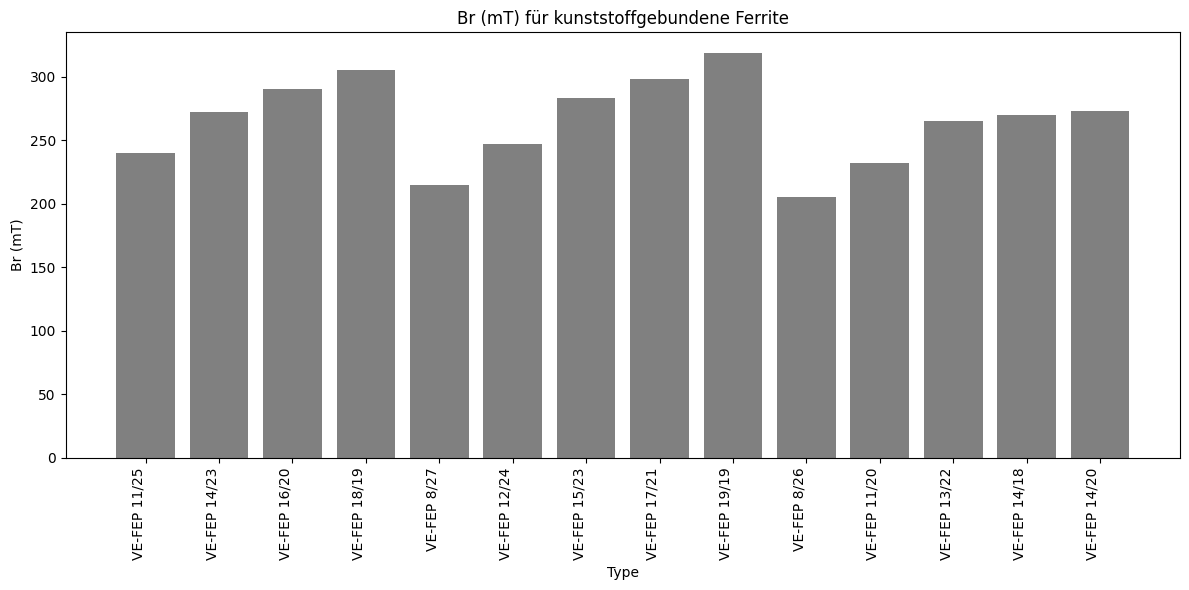

In [87]:
import matplotlib.pyplot as plt

# Daten für den Plot
x_values = df_ferrite['Type']
y_values = df_ferrite['Br (mT)']

# Plot erstellen
plt.figure(figsize=(12, 6))
plt.bar(x_values, y_values, color='grey')
plt.xlabel('Type')
plt.ylabel('Br (mT)')
plt.title('Br (mT) für kunststoffgebundene Ferrite')
plt.xticks(rotation=90, ha="right")  
plt.tight_layout()

# Plot anzeigen
plt.show()


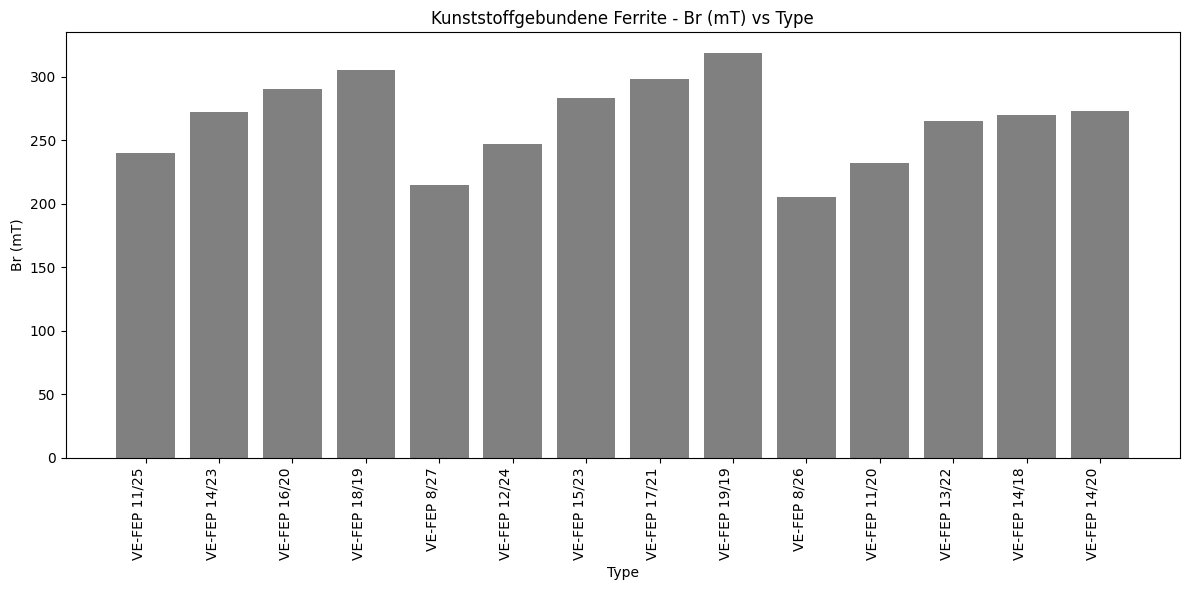

In [88]:




import matplotlib.pyplot as plt

# Daten für den Plot
x_values = df_plastic_ferrite_2 ['Type']
y_values = df_plastic_ferrite_2 ['Br (mT)']

# Plot erstellen
plt.figure(figsize=(12, 6))
plt.bar(x_values, y_values, color='grey')
plt.xlabel('Type')
plt.ylabel('Br (mT)')
plt.title('Kunststoffgebundene Ferrite - Br (mT) vs Type')
plt.xticks(rotation=90, ha="right")  
plt.tight_layout()

# Plot anzeigen
plt.show()


In [89]:
df_plastic_ferrite_2

Type  Br (mT)  HcB (kA/m)  HcI (kA/m)  (BH)max (kJ/m³)  \
0   VE-FEP 11/25      240         180         250             11.2   
1   VE-FEP 14/23      272         190         230             14.2   
2   VE-FEP 16/20      290         185         205             16.5   
3   VE-FEP 18/19      305         180         195             18.1   
4    VE-FEP 8/27      215         140         270              8.5   
5   VE-FEP 12/24      247         183         239             11.9   
6   VE-FEP 15/23      283         195         230             15.6   
7   VE-FEP 17/21      298         183         211             17.3   
8   VE-FEP 19/19      319         171         191             19.3   
9    VE-FEP 8/26      205         158         260              8.3   
10  VE-FEP 11/20      232         163         199             10.7   
11  VE-FEP 13/22      265         175         220             13.5   
12  VE-FEP 14/18      270         167         183             14.3   
13  VE-FEP 14/20      273         179         203             14.6   

    Temp / Koeff. (%/k)  Dichte (g/cm³)         Arbeitstemp. (°C)  \
0                 -0.19            3.22   120-160°C PA6 anisotrop   
1                 -0.19            3.53   120-160°C PA6 anisotrop   
2                 -0.19            3.71   120-160°C PA6 anisotrop   
3                 -0.19            3.83   120-160°C PA6 anisotrop   
4                 -0.19            3.03  120-140°C PA12 anisotrop   
5                 -0.19            3.30  120-140°C PA12 anisotrop   
6                 -0.19            3.63  120-140°C PA12 anisotrop   
7                 -0.19            3.80  120-140°C PA12 anisotrop   
8                 -0.19            3.98  120-140°C PA12 anisotrop   
9                 -0.19            3.20       220°C PPS anisotrop   
10                -0.19            3.25       220°C PPS anisotrop   
11                -0.19            3.60       220°C PPS anisotrop   
12                -0.19            3.80       220°C PPS anisotrop   
13                -0.19            3.73       220°C PPS anisotrop   

                         Binder  
0   Kunststoffgebundene Ferrite  
1   Kunststoffgebundene Ferrite  
2   Kunststoffgebundene Ferrite  
3   Kunststoffgebundene Ferrite  
4   Kunststoffgebundene Ferrite  
5   Kunststoffgebundene Ferrite  
6   Kunststoffgebundene Ferrite  
7   Kunststoffgebundene Ferrite  
8   Kunststoffgebundene Ferrite  
9   Kunststoffgebundene Ferrite  
10  Kunststoffgebundene Ferrite  
11  Kunststoffgebundene Ferrite  
12  Kunststoffgebundene Ferrite  
13  Kunststoffgebundene Ferrite